In [1]:
# conda install -c conda-forge gensim==3.8.3
# !pip3 install -U "tmtoolkit[recommended,lda,sklearn,gensim]"

In [2]:
# conda remove --force gensim=4.12.0

In [3]:
# conda install spacy

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
# import gensim
# print(gensim.__version__)

In [6]:
import os
import re
import ast
import pandas as pd
import numpy as np
import tqdm
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from gensim.models import Phrases
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel

# Creation of dictionary + corpus 

In [7]:
# Read the CSV file
df = pd.read_csv('/Users/jadengoh/Downloads/train_data.csv')

# Define custom stopwords
custom_stopwords = set(stopwords.words('english'))
# custom_stopwords = set(stopwords.words('english')) | {'enron'}

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    # Remove non-alphabetical characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenize into words, remove stopwords, lemmatize, and filter out short words
    tokens = word_tokenize(text.lower())
    filtered_words = [lemmatizer.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) > 1]
    return filtered_words


# def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     """https://spacy.io/api/annotation"""
#     texts_out = []
#     for sent in texts:
#         doc = nlp(" ".join(sent)) 
#         texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
#     return texts_out

# nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
# ham_data_lemmatized = lemmatization(bi_ham_df['tokens_bi'], allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# spam_data_lemmatized = lemmatization(bi_spam_df['tokens_bi'], allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


# Preprocess text data
df['tokens'] = df['text'].apply(preprocess_text)

# Separate spam and ham text - Unigram
uni_spam_df = df[df['label'] == 'spam']
uni_ham_df = df[df['label'] == 'ham']

# Create dictionary and corpus for spam text - Unigram
uni_spam_dictionary = corpora.Dictionary(uni_spam_df['tokens'])
uni_spam_corpus = [uni_spam_dictionary.doc2bow(text) for text in uni_spam_df['tokens']]

# Create dictionary and corpus for ham text - Unigram
uni_ham_dictionary = corpora.Dictionary(uni_ham_df['tokens'])
uni_ham_corpus = [uni_ham_dictionary.doc2bow(text) for text in uni_ham_df['tokens']]


# Create bigrams
bigram = Phrases(df['tokens'], min_count=5, threshold=100)
df['tokens_bi'] = list(bigram[df['tokens']])

# Separate spam and ham text - Bigram
bi_spam_df = df[df['label'] == 'spam']
bi_ham_df = df[df['label'] == 'ham']

# Create dictionary and corpus for spam text - Bigram
bi_spam_dictionary = corpora.Dictionary(bi_spam_df['tokens_bi'])
bi_spam_corpus = [bi_spam_dictionary.doc2bow(text) for text in bi_spam_df['tokens_bi']]

# Create dictionary and corpus for ham text - Bigram
bi_ham_dictionary = corpora.Dictionary(bi_ham_df['tokens_bi'])
bi_ham_corpus = [bi_ham_dictionary.doc2bow(text) for text in bi_ham_df['tokens_bi']]

# Text Col
uni_col = "tokens"
bi_col = "tokens_bi"

In [8]:
df

label                                               text  \
0      spam  calgary , alberta , jul 7 , 2005 ( ccnmatthews...   
1       ham  louise , as of today there is $ 722 , 572 in s...   
2       ham                             Lmao but its so fun...   
3       ham  hi : here ' s the presentation . - - - - - ori...   
4       ham                                              fraud   
...     ...                                                ...   
47487  spam  splashmobile choose from 1000s of gr8 tones ea...   
47488  spam  = ? utf - 8 ? q ? incuring improved ? = = ? ut...   
47489  spam  Hello from Orange. For 1 month's free access t...   
47490   ham  jcc that this email constitutes your groups vi...   
47491  spam  baltia capital investment ltd . , the leading ...   

                                            cleaned_text  \
0      calgary , alberta , jul 7 , 2005 ( ccnmatthews...   
1      louise , as of today there is $ 722 , 572 in s...   
2                                 Lmao but its so fun...   
3      hi : here ' s the presentation . - - - - - ori...   
4                                                  fraud   
...                                                  ...   
47487  splashmobile choose from 1000s of gr8 tones ea...   
47488  = ? utf - 8 ? q ? incuring improved ? = = ? ut...   
47489  Hello from Orange. For 1 month's free access t...   
47490  jcc that this email constitutes your groups vi...   
47491  baltia capital investment ltd . , the leading ...   

                                     preprocessed_tokens  \
0      ['calgari', 'alberta', 'jul', 'ccnmatthew', 'v...   
1      ['louis', 'today', 'schedul', 'c', 'tbg', 'set...   
2                                        ['lmao', 'fun']   
3      ['hi', 'present', 'origin', 'messag', 'kitchen...   
4                                              ['fraud']   
...                                                  ...   
47487  ['splashmobil', 'choos', 'gr', 'tone', 'wk', '...   
47488  ['utf', 'q', 'incur', 'improv', 'utf', 'q', 'p...   
47489  ['hello', 'orang', 'month', 'free', 'access', ...   
47490  ['jcc', 'email', 'constitut', 'group', 'vinc',...   
47491  ['baltia', 'capit', 'invest', 'ltd', 'lead', '...   

       punctuation_percentage  num_chars  num_sentences  num_words  \
0                    2.566049   0.028841       0.017150   0.026634   
1                    3.571429   0.002575       0.002309   0.002930   
2                   13.636364   0.000096       0.000330   0.000160   
3                    8.040712   0.008605       0.004947   0.007484   
4                    0.000000   0.000022       0.000330   0.000027   
...                       ...        ...            ...        ...   
47487                0.000000   0.000657       0.000330   0.000719   
47488                6.081081   0.001296       0.003628   0.001225   
47489                7.051282   0.000683       0.000989   0.000719   
47490                0.000000   0.002444       0.000330   0.002690   
47491                2.487805   0.017955       0.010884   0.017925   

       num_misspellings  misspelling_percentage  ...  money_score  \
0                    38                0.038000  ...     0.015611   
1                     8                0.072727  ...     0.000000   
2                     2                0.333333  ...     0.000000   
3                    84                0.298932  ...     0.002288   
4                     0                0.000000  ...     0.000000   
...                 ...                     ...  ...          ...   
47487                 6                0.222222  ...     0.037037   
47488                 2                0.043478  ...     0.000000   
47489                 2                0.074074  ...     0.000000   
47490                13                0.128713  ...     0.000000   
47491                14                0.020802  ...     0.029677   

       payment_score  celebration_score achievement_score url_presence  \
0           0.013010       

# LDA model - Gensim

## Classifying whether unigrams or bigrams are better

In [9]:
# Build LDA model for spam text
def spamLdaModel(spamDict, hamDict, spamCorp, hamCorp, spamIdDict, hamIdDict, textCol, numTopics):
    
    spam_lda_model = LdaModel(
        corpus=spamCorp, 
        id2word=spamIdDict, 
        num_topics=numTopics,
        chunksize=100,
        passes=2,
        iterations=600,
        random_state=42
    )

#     # Print topics for spam text
#     print("Topics for spam text:")
#     for topic_id, topic in spam_lda_model.print_topics(num_topics=numTopics):
#         print(f'Topic {topic_id}: {topic}')
#     print()

    # Build LDA model for ham text
    ham_lda_model = LdaModel(corpus=hamCorp, id2word=hamIdDict, num_topics=numTopics)

#     # Print topics for ham text
#     print("Topics for ham text:")
#     for topic_id, topic in ham_lda_model.print_topics(num_topics=numTopics):
#         print(f'Topic {topic_id}: {topic}')
        
    # Calculate coherence score for spam topics
    spam_coherence_model = CoherenceModel(model=spam_lda_model, texts=spamDict[textCol], dictionary=spamIdDict, coherence='c_v')
    spam_coherence_score = spam_coherence_model.get_coherence()
#     print("Coherence score for spam topics:", spam_coherence_score)

    # Calculate coherence score for ham topics
    ham_coherence_model = CoherenceModel(model=ham_lda_model, texts=hamDict[textCol], dictionary=hamIdDict, coherence='c_v')
    ham_coherence_score = ham_coherence_model.get_coherence()
#     print("Coherence score for ham topics:", ham_coherence_score)
    
    return spam_lda_model, ham_lda_model, spam_coherence_score, ham_coherence_score

## Initial Parameters

In [10]:
import matplotlib.pyplot as plt 
%matplotlib inline

min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

## Unigrams

In [11]:
uni_spam_lda_coher_vals = []
uni_ham_lda_coher_vals = []
uni_spam_lda_models = []
uni_ham_lda_models = []

for k in tqdm.tqdm(range(min_topics, max_topics)):
    spam_lda_model, ham_lda_model, spam_lda_coher, ham_lda_coher = spamLdaModel(uni_spam_df, uni_ham_df, uni_spam_corpus, uni_ham_corpus, uni_spam_dictionary, uni_ham_dictionary, "tokens", k)
    uni_spam_lda_models.append(spam_lda_model)
    uni_ham_lda_models.append(ham_lda_model)
    uni_spam_lda_coher_vals.append(spam_lda_coher)
    uni_ham_lda_coher_vals.append(ham_lda_coher)

100%|██████████| 9/9 [07:16<00:00, 48.55s/it]


In [12]:
uni_spam_lda_coher_vals

[0.46971292980220725,
 0.4464081298778227,
 0.5168703643205274,
 0.5556721131627428,
 0.5542348631655435,
 0.46685892083558184,
 0.5535984618463679,
 0.5117161395220915,
 0.5400432535322504]

In [13]:
uni_ham_lda_coher_vals

[0.6048642082691507,
 0.47690825206713755,
 0.5320779835336407,
 0.5671675645931294,
 0.5488921813047469,
 0.5236099210699121,
 0.5619283746666667,
 0.516855221229829,
 0.5507950925092764]

## Coherence Score Distribution Gensim LDA - Unigrams

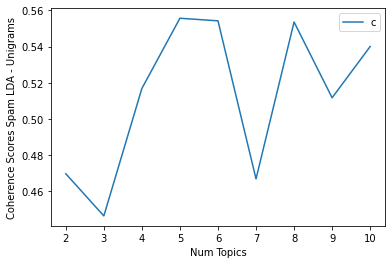

In [14]:
x_uni = range(min_topics, max_topics, step_size)
plt.plot(x_uni, uni_spam_lda_coher_vals)
plt.xlabel("Num Topics") 
plt.ylabel("Coherence Scores Spam LDA - Unigrams") 
plt.legend(("coherence_values"), loc='best') 
plt.show()

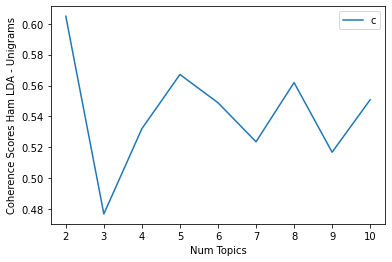

In [15]:
plt.plot(x_uni, uni_ham_lda_coher_vals)
plt.xlabel("Num Topics") 
plt.ylabel("Coherence Scores Ham LDA - Unigrams") 
plt.legend(("coherence_values"), loc='best') 
plt.show()

In [16]:
print(f"Coherence scores for Spam LDA - Unigrams {np.mean(uni_spam_lda_coher_vals)}")
print(f"Coherence scores for Ham LDA - Unigrams {np.mean(uni_ham_lda_coher_vals)}")

Coherence scores for Spam LDA - Unigrams 0.5127905751183484
Coherence scores for Ham LDA - Unigrams 0.5425665332492766


# Final Model Gensim LDA - Unigrams

In [17]:
# Num Topics Spam - Uni
uni_spam_lda_topic_idx1 = np.argmax(uni_spam_lda_coher_vals)
print(uni_spam_lda_topic_idx1)
print(uni_spam_lda_coher_vals[uni_spam_lda_topic_idx1]) 

3
0.5556721131627428


In [18]:
# Gensim LDA Model - Uni - Spam
uni_spam_lda_num_topics1 = uni_spam_lda_topic_idx1 + 2
uni_spam_lda_model1, uni_ham_lda_model1, uni_spam_lda_coher1, uni_ham_lda_coher1 = spamLdaModel(uni_spam_df, uni_ham_df, uni_spam_corpus, uni_ham_corpus, uni_spam_dictionary, uni_ham_dictionary, "tokens", uni_spam_lda_num_topics1)

# Print topics for spam text
print("Topics for spam text:")
for topic_id, topic in uni_spam_lda_model1.print_topics(num_topics=uni_spam_lda_num_topics1):
    print(f'Topic {topic_id}: {topic}')
print()

print("Coherence score for spam topics:", uni_spam_lda_coher1)

Topics for spam text:
Topic 0: 0.018*"com" + 0.010*"free" + 0.010*"email" + 0.010*"www" + 0.010*"http" + 0.008*"click" + 0.008*"please" + 0.007*"get" + 0.007*"message" + 0.007*"offer"
Topic 1: 0.023*"de" + 0.008*"la" + 0.007*"pill" + 0.006*"que" + 0.005*"el" + 0.005*"en" + 0.004*"br" + 0.004*"para" + 0.003*"e" + 0.003*"drug"
Topic 2: 0.021*"company" + 0.011*"statement" + 0.009*"investment" + 0.008*"report" + 0.008*"security" + 0.008*"information" + 0.008*"stock" + 0.007*"may" + 0.007*"within" + 0.007*"market"
Topic 3: 0.012*"account" + 0.012*"money" + 0.010*"number" + 0.008*"u" + 0.007*"million" + 0.007*"fund" + 0.007*"claim" + 0.007*"bank" + 0.006*"program" + 0.006*"please"
Topic 4: 0.012*"adobe" + 0.009*"http" + 0.008*"software" + 0.007*"price" + 0.006*"cd" + 0.005*"get" + 0.005*"professional" + 0.005*"size" + 0.005*"font" + 0.004*"check"

Coherence score for spam topics: 0.5556721131627428


# Wordcloud - LDA Spam Text Unigrams

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


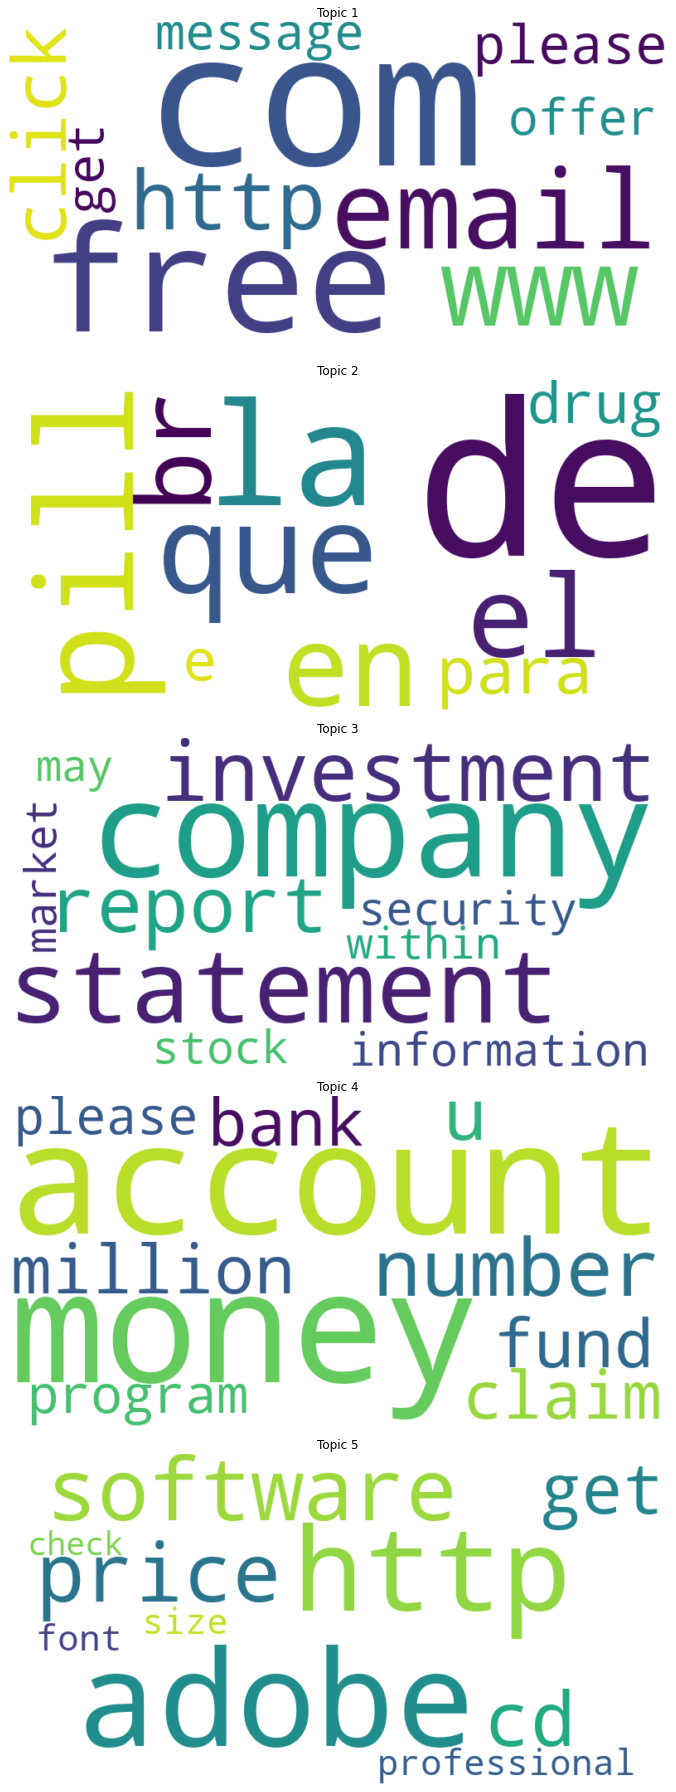

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display wordcloud
def generate_wordcloud_per_topic(topics):
    # Create a figure with multiple subplots, one for each topic
    num_topics = len(topics)
    fig, axes = plt.subplots(num_topics, 1, figsize=(10, 5*num_topics))
    
    # Generate a word cloud for each topic
    for i, topic in enumerate(topics):
        # Generate a word cloud for the current topic
        wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(topic)

        # Plot the word cloud for the current topic
        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].set_title('Topic {}'.format(i+1))
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()


# Define the topics
topics = [
    {"com": 0.018, "free": 0.010, "email": 0.010, "www": 0.010, "http": 0.010, "click": 0.008, "please": 0.008, "get": 0.007, "message": 0.007, "offer": 0.007},
    {"de": 0.023, "la": 0.008, "pill": 0.007, "que": 0.006, "el": 0.005, "en": 0.005, "br": 0.004, "para": 0.004, "e": 0.003, "drug": 0.003},
    {"company": 0.021, "statement": 0.011, "investment": 0.009, "report": 0.008, "security": 0.008, "information": 0.008, "stock": 0.008, "may": 0.007, "within": 0.007, "market": 0.007},
    {"account": 0.012, "money": 0.012, "number": 0.010, "u": 0.008, "million": 0.007, "fund": 0.007, "claim": 0.007, "bank": 0.007, "program": 0.006, "please": 0.006},
    {"adobe": 0.012, "http": 0.009, "software": 0.008, "price": 0.007, "cd": 0.006, "get": 0.005, "professional": 0.005, "size": 0.005, "font": 0.005, "check": 0.004}
]

# Generate and display word clouds for each topic
generate_wordcloud_per_topic(topics)


# LDAVis - Spam Text Unigrams

In [19]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
pyLDAvis.enable_notebook()

lda_display = gensimvis.prepare(uni_spam_lda_model1, uni_spam_corpus, uni_spam_dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [20]:
# Num Topics Ham - Uni
uni_ham_lda_topic_idx2 = np.argmax(uni_ham_lda_coher_vals)
print(uni_ham_lda_topic_idx2)
print(uni_ham_lda_coher_vals[uni_ham_lda_topic_idx2]) 

0
0.6048642082691507


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Gensim LDA Model - Uni - Ham
uni_ham_lda_num_topics2 = uni_ham_lda_topic_idx2 + 2
uni_spam_lda_model2, uni_ham_lda_model2, uni_spam_lda_coher2, uni_ham_lda_coher2 = spamLdaModel(uni_spam_df, uni_ham_df, uni_spam_corpus, uni_ham_corpus, uni_spam_dictionary, uni_ham_dictionary, "tokens", uni_ham_lda_num_topics2)

# Print topics for ham text
print("Topics for ham text:")
for topic_id, topic in uni_spam_lda_model2.print_topics(num_topics=uni_ham_lda_num_topics2):
    print(f'Topic {topic_id}: {topic}')
print()

print("Coherence score for ham topics:", uni_ham_lda_coher2)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topics for ham text:
Topic 0: 0.008*"com" + 0.006*"http" + 0.005*"email" + 0.005*"please" + 0.005*"u" + 0.005*"get" + 0.004*"money" + 0.004*"www" + 0.004*"free" + 0.004*"one"
Topic 1: 0.013*"company" + 0.008*"statement" + 0.007*"de" + 0.005*"stock" + 0.005*"security" + 0.005*"investment" + 0.005*"information" + 0.004*"may" + 0.004*"within" + 0.004*"report"

Coherence score for ham topics: 0.6124393634322791


# Wordcloud - LDA Ham Text Unigrams

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


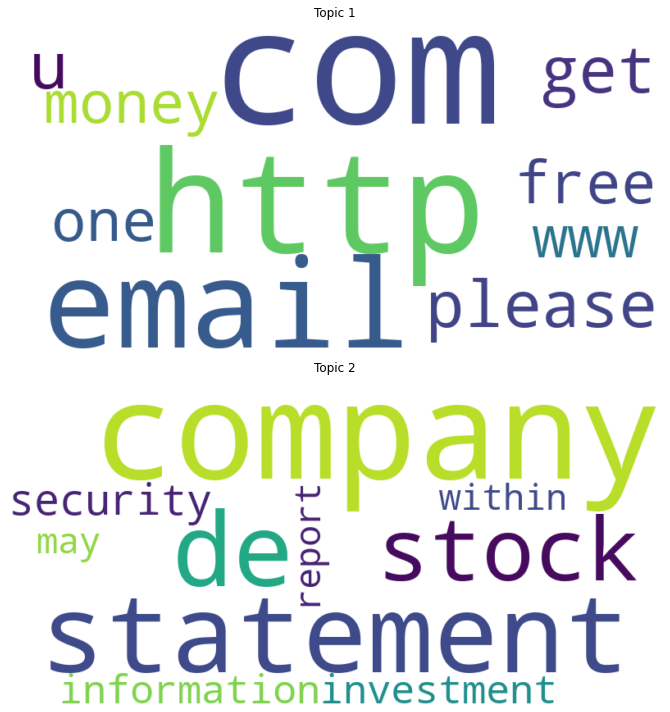

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the topics
topics = [
    {"com": 0.008, "http": 0.006, "email": 0.005, "please": 0.005, "u": 0.005, "get": 0.005, "money": 0.004, "www": 0.004, "free": 0.004, "one": 0.004},
    {"company": 0.013, "statement": 0.008, "de": 0.007, "stock": 0.005, "security": 0.005, "investment": 0.005, "information": 0.005, "may": 0.004, "within": 0.004, "report": 0.004}
]

# Generate and display word clouds for each topic
generate_wordcloud_per_topic(topics)

# LDAVis - Ham Text Unigrams

In [22]:
# Preparing the LDA visualization for ham texts
lda_display_uni_ham = gensimvis.prepare(uni_ham_lda_model2, uni_ham_corpus, uni_ham_dictionary, sort_topics=False)

# Displaying the visualization for ham texts
pyLDAvis.display(lda_display_uni_ham)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Bigrams

In [23]:
bi_spam_lda_coher_vals = []
bi_ham_lda_coher_vals = []
bi_spam_lda_models = []
bi_ham_lda_models = []

for k in tqdm.tqdm(range(min_topics, max_topics)):
    spam_lda_model, ham_lda_model, spam_lda_coher, ham_lda_coher = spamLdaModel(bi_spam_df, bi_ham_df, bi_spam_corpus, bi_ham_corpus, bi_spam_dictionary, bi_ham_dictionary, "tokens_bi", k)
    bi_spam_lda_models.append(spam_lda_model)
    bi_ham_lda_models.append(ham_lda_model)
    bi_spam_lda_coher_vals.append(spam_lda_coher)
    bi_ham_lda_coher_vals.append(ham_lda_coher)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 9/9 [07:10<00:00, 47.80s/it]


In [24]:
bi_spam_lda_coher_vals

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.5088973908479346,
 0.4590241149820591,
 0.4055768372689514,
 0.5264670244166385,
 0.47494431351899463,
 0.4817849892361038,
 0.5035373398367756,
 0.4660185035892219,
 0.46638967630805084]

In [25]:
bi_ham_lda_coher_vals

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.3738053900338325,
 0.5022218538810056,
 0.5364902508520335,
 0.5333649772971765,
 0.5194313850939539,
 0.47666790147360205,
 0.4334060002183538,
 0.5167261535912079,
 0.538844470019866]

## Coherence Score Distribution Gensim LDA - Bigrams

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


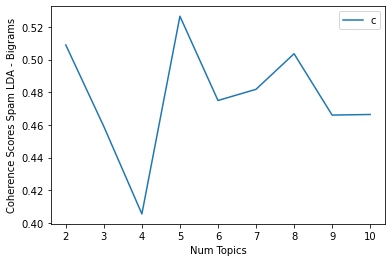

In [26]:
x_bi = range(min_topics, max_topics, step_size)
plt.plot(x_bi, bi_spam_lda_coher_vals)
plt.xlabel("Num Topics") 
plt.ylabel("Coherence Scores Spam LDA - Bigrams") 
plt.legend(("coherence_values"), loc='best') 
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


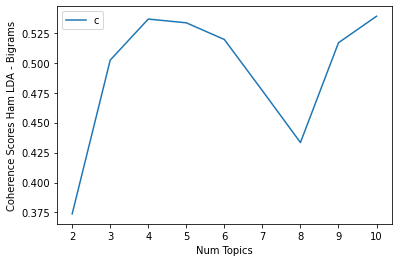

In [27]:
plt.plot(x_bi, bi_ham_lda_coher_vals) # append coher values here
plt.xlabel("Num Topics") 
plt.ylabel("Coherence Scores Ham LDA - Bigrams") 
plt.legend(("coherence_values"), loc='best') 
plt.show()

In [28]:
print(f"Coherence scores for Spam LDA - Bigrams {np.mean(bi_spam_lda_coher_vals)}")
print(f"Coherence scores for Ham LDA - Bigrams {np.mean(bi_ham_lda_coher_vals)}")

Coherence scores for Spam LDA - Bigrams 0.4769600211116367
Coherence scores for Ham LDA - Bigrams 0.4923287091623368


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Final Model Gensim LDA - Bigrams

In [29]:
# Num Topics Spam - Bi
bi_spam_lda_topic_idx1 = np.argmax(bi_spam_lda_coher_vals)
print(bi_spam_lda_topic_idx1)
print(bi_spam_lda_coher_vals[bi_spam_lda_topic_idx1]) 

3
0.5264670244166385


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
# Gensim LDA Model - Bi - Spam
bi_spam_lda_num_topics1 = bi_spam_lda_topic_idx1 + 2
bi_spam_lda_model1, bi_ham_lda_model1, bi_spam_lda_coher1, bi_ham_lda_coher1 = spamLdaModel(bi_spam_df, bi_ham_df, bi_spam_corpus, bi_ham_corpus, bi_spam_dictionary, bi_ham_dictionary, "tokens_bi", bi_spam_lda_num_topics1)

# Print topics for spam text
print("Topics for spam text:")
for topic_id, topic in bi_spam_lda_model1.print_topics(num_topics=bi_spam_lda_num_topics1):
    print(f'Topic {topic_id}: {topic}')
print()

print("Coherence score for spam topics:", bi_spam_lda_coher1)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topics for spam text:
Topic 0: 0.017*"com" + 0.011*"email" + 0.008*"please" + 0.008*"get" + 0.008*"click" + 0.008*"time" + 0.008*"one" + 0.008*"free" + 0.007*"message" + 0.007*"make"
Topic 1: 0.003*"save" + 0.002*"font" + 0.002*"pill_pill" + 0.002*"al" + 0.002*"die" + 0.002*"nice" + 0.002*"day" + 0.002*"der" + 0.002*"adobe" + 0.002*"br"
Topic 2: 0.023*"company" + 0.010*"information" + 0.009*"stock" + 0.009*"security" + 0.008*"may" + 0.008*"statement" + 0.007*"report" + 0.007*"market" + 0.006*"price" + 0.005*"product"
Topic 3: 0.011*"price" + 0.010*"http" + 0.009*"software" + 0.007*"site" + 0.007*"get" + 0.007*"want" + 0.006*"com" + 0.005*"free" + 0.005*"cd" + 0.005*"new"
Topic 4: 0.015*"de" + 0.014*"account" + 0.009*"u" + 0.008*"number" + 0.008*"money" + 0.007*"bank" + 0.006*"please" + 0.006*"million" + 0.006*"mr" + 0.006*"fund"

Coherence score for spam topics: 0.5264670244166385


# Wordcloud - LDA Spam Text Bigrams

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


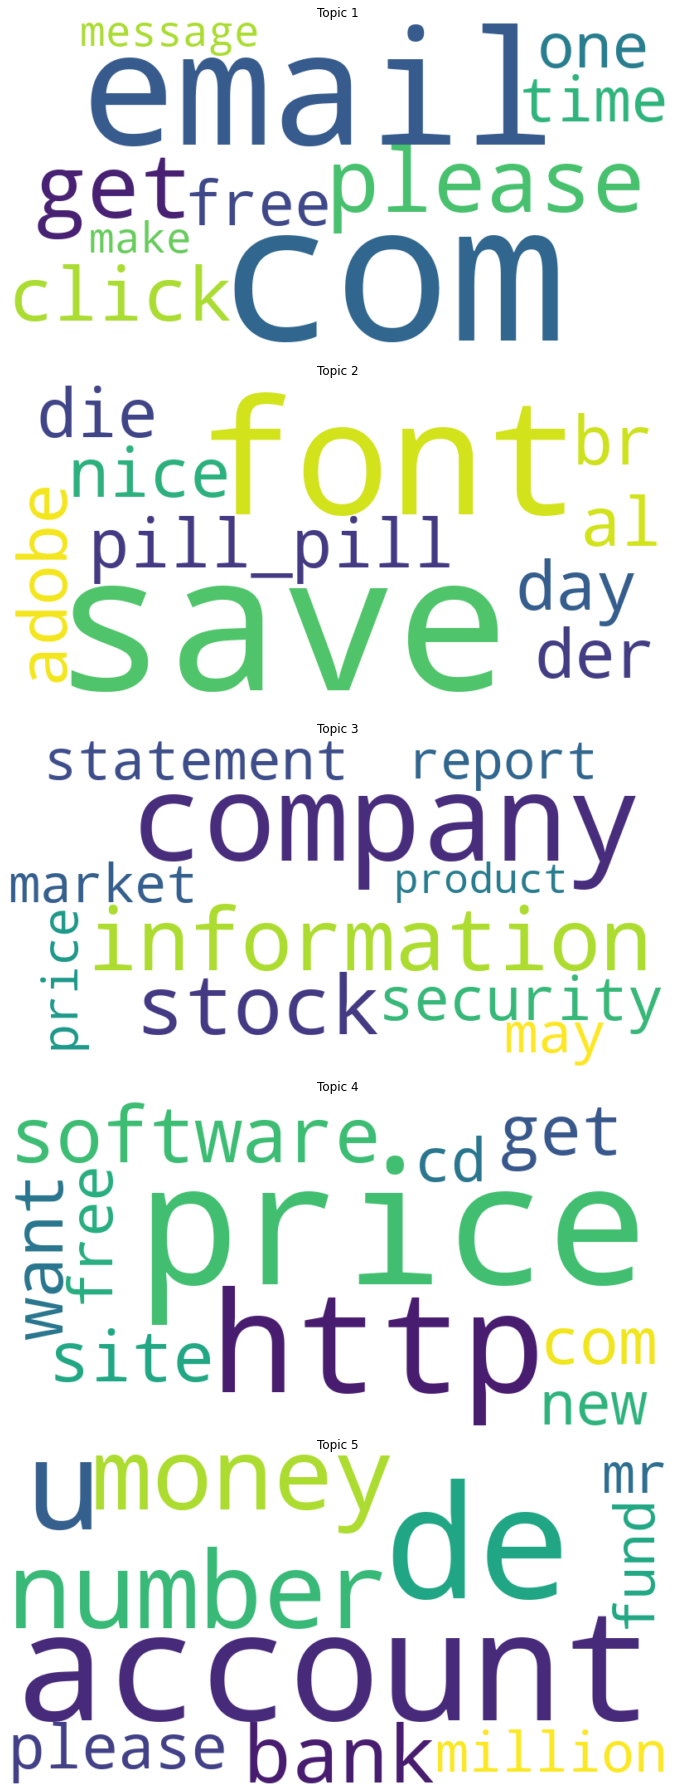

In [62]:
# Define the spam topics
spam_topics = [
    {"com": 0.017, "email": 0.011, "please": 0.008, "get": 0.008, "click": 0.008, "time": 0.008, "one": 0.008, "free": 0.008, "message": 0.007, "make": 0.007},
    {"save": 0.003, "font": 0.002, "pill_pill": 0.002, "al": 0.002, "die": 0.002, "nice": 0.002, "day": 0.002, "der": 0.002, "adobe": 0.002, "br": 0.002},
    {"company": 0.023, "information": 0.010, "stock": 0.009, "security": 0.009, "may": 0.008, "statement": 0.008, "report": 0.007, "market": 0.007, "price": 0.006, "product": 0.005},
    {"price": 0.011, "http": 0.010, "software": 0.009, "site": 0.007, "get": 0.007, "want": 0.007, "com": 0.006, "free": 0.005, "cd": 0.005, "new": 0.005},
    {"de": 0.015, "account": 0.014, "u": 0.009, "number": 0.008, "money": 0.008, "bank": 0.007, "please": 0.006, "million": 0.006, "mr": 0.006, "fund": 0.006}
]

# Generate and display word clouds for each topic
generate_wordcloud_per_topic(spam_topics)


# LDAVis - Spam Text Bigrams

In [31]:
# Preparing the LDA visualization
lda_display_bi = gensimvis.prepare(bi_spam_lda_model1, bi_spam_corpus, bi_spam_dictionary, sort_topics=False)

# Displaying the visualization
pyLDAvis.display(lda_display_bi)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# Num Topics Ham - Bi
bi_ham_lda_topic_idx2 = np.argmax(bi_ham_lda_coher_vals)
print(bi_ham_lda_topic_idx2)
print(bi_ham_lda_coher_vals[bi_ham_lda_topic_idx2]) 

8
0.538844470019866


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
# Gensim LDA Model - Bi - Ham
bi_ham_lda_num_topics2 = bi_ham_lda_topic_idx2 + 2
bi_spam_lda_model2, bi_ham_lda_model2, bi_spam_lda_coher2, bi_ham_lda_coher2 = spamLdaModel(bi_spam_df, bi_ham_df, bi_spam_corpus, bi_ham_corpus, bi_spam_dictionary, bi_ham_dictionary, "tokens_bi", bi_ham_lda_num_topics2)

# Print topics for ham text
print("Topics for ham text:")
for topic_id, topic in bi_spam_lda_model2.print_topics(num_topics=bi_ham_lda_num_topics2):
    print(f'Topic {topic_id}: {topic}')
print()

print("Coherence score for ham topics:", bi_ham_lda_coher2)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topics for ham text:
Topic 0: 0.019*"company" + 0.015*"business" + 0.014*"logo" + 0.013*"shop" + 0.012*"save" + 0.011*"extra" + 0.010*"image" + 0.010*"day" + 0.008*"website" + 0.007*"cl"
Topic 1: 0.023*"software" + 0.020*"pro" + 0.016*"professional" + 0.013*"adobe_photoshop" + 0.013*"edition" + 0.012*"adobe" + 0.011*"drug" + 0.008*"font" + 0.008*"adobe_premiere" + 0.008*"issue"
Topic 2: 0.034*"company" + 0.012*"security" + 0.012*"stock" + 0.012*"information" + 0.012*"statement" + 0.011*"may" + 0.011*"market" + 0.009*"report" + 0.007*"technology" + 0.007*"price"
Topic 3: 0.066*"de" + 0.017*"que" + 0.015*"en" + 0.012*"el" + 0.010*"r" + 0.008*"official" + 0.008*"approved" + 0.008*"fast" + 0.007*"happy" + 0.007*"men"
Topic 4: 0.014*"bank" + 0.014*"money" + 0.014*"fund" + 0.013*"account" + 0.013*"mr" + 0.013*"million" + 0.013*"u" + 0.013*"claim" + 0.010*"international" + 0.010*"business"
Topic 5: 0.031*"http" + 0.020*"com" + 0.017*"price" + 0.013*"online" + 0.012*"pill" + 0.011*"shipping" +

# Wordcloud - LDA Ham Text Bigrams

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


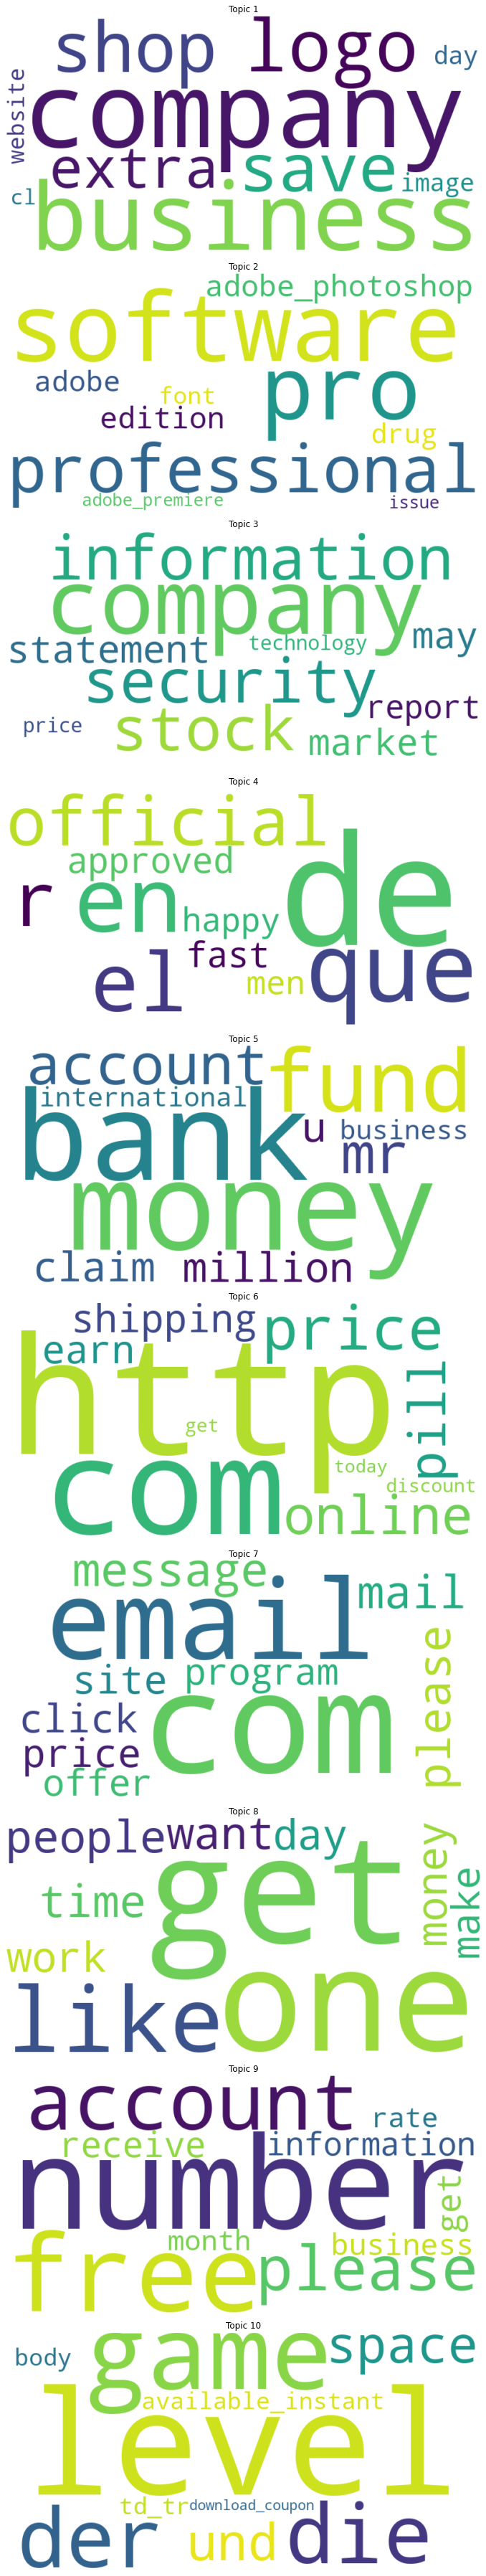

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the new topics
new_topics = [
    {"company": 0.019, "business": 0.015, "logo": 0.014, "shop": 0.013, "save": 0.012, "extra": 0.011, "image": 0.010, "day": 0.010, "website": 0.008, "cl": 0.007},
    {"software": 0.023, "pro": 0.020, "professional": 0.016, "adobe_photoshop": 0.013, "edition": 0.013, "adobe": 0.012, "drug": 0.011, "font": 0.008, "adobe_premiere": 0.008, "issue": 0.008},
    {"company": 0.034, "security": 0.012, "stock": 0.012, "information": 0.012, "statement": 0.012, "may": 0.011, "market": 0.011, "report": 0.009, "technology": 0.007, "price": 0.007},
    {"de": 0.066, "que": 0.017, "en": 0.015, "el": 0.012, "r": 0.010, "official": 0.008, "approved": 0.008, "fast": 0.008, "happy": 0.007, "men": 0.007},
    {"bank": 0.014, "money": 0.014, "fund": 0.014, "account": 0.013, "mr": 0.013, "million": 0.013, "u": 0.013, "claim": 0.013, "international": 0.010, "business": 0.010},
    {"http": 0.031, "com": 0.020, "price": 0.017, "online": 0.013, "pill": 0.012, "shipping": 0.011, "earn": 0.011, "discount": 0.010, "get": 0.010, "today": 0.009},
    {"com": 0.034, "email": 0.019, "message": 0.012, "mail": 0.011, "please": 0.011, "click": 0.008, "price": 0.008, "site": 0.008, "program": 0.007, "offer": 0.007},
    {"get": 0.012, "one": 0.011, "like": 0.009, "people": 0.008, "want": 0.008, "time": 0.008, "work": 0.007, "money": 0.007, "day": 0.007, "make": 0.006},
    {"number": 0.014, "free": 0.013, "account": 0.012, "please": 0.012, "receive": 0.009, "get": 0.008, "information": 0.008, "business": 0.008, "rate": 0.007, "month": 0.007},
    {"level": 0.007, "game": 0.005, "die": 0.003, "der": 0.003, "space": 0.003, "und": 0.003, "available_instant": 0.002, "td_tr": 0.002, "body": 0.002, "download_coupon": 0.002}
]

# Generate and display word clouds for each topic
generate_wordcloud_per_topic(new_topics)

# LDAVis - Ham Text Bigrams

In [34]:
# Preparing the LDA visualization for bigram ham texts
lda_display_bi_ham = gensimvis.prepare(bi_ham_lda_model2, bi_ham_corpus, bi_ham_dictionary, sort_topics=False)

# Displaying the visualization
pyLDAvis.display(lda_display_bi_ham)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Getting LDA topics from Gensim model - Unigrams

In [35]:
def get_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
# uni-gram spam topics
uni_spam_lda_topics = get_topics(uni_spam_lda_model1, uni_spam_lda_num_topics1)
uni_spam_lda_topics

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic # 01 Topic # 02   Topic # 03     Topic # 04    Topic # 05
0         com         de      company        account         adobe
1        free         la    statement          money          http
2       email       pill   investment         number      software
3         www        que       report              u         price
4        http         el     security        million            cd
5       click         en  information           fund           get
6      please         br        stock          claim  professional
7         get       para          may           bank          size
8     message          e       within        program          font
9       offer       drug       market         please         check
10       time     cialis       future           name        window
11       mail         se          gas  international          like
12       link         da          act          email           pro
13          u         mg      looking        address          need
14        new       save   technology           part          face
15       list        con      forward             mr          best
16        one         ur        price            one          save
17       site        com          inc        contact         color
18       work         tr         news        lottery          good
19      order         un      service       business     microsoft

In [37]:
# uni-gram ham topics
uni_ham_lda_topics = get_topics(uni_ham_lda_model2, uni_ham_lda_num_topics2)
uni_ham_lda_topics

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic # 01 Topic # 02
0       enron        ect
1     company      enron
2        said        hou
3      energy      vince
4      market     please
5     billion    subject
6         new         pm
7        year         cc
8       power        com
9       would      would
10  financial     thanks
11      stock       know
12   business   kaminski
13     credit    message
14      share       need
15      price       time
16    trading       deal
17    million        get
18     dynegy        let
19      jones       corp

# Most dominant topics LDA Gensim

In [38]:
def format_topics_sentences(ldamodel, corpus, data, dictionary):
    # Initialize an empty list to store dictionaries
    topic_data = []

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                # Append a dictionary with the required information to topic_data list
                topic_data.append({
                    'Document_No': i,
                    'Dominant_Topic': int(topic_num),
                    'Perc_Contribution': round(prop_topic, 4),
                    'Keywords': topic_keywords,
                    'Text': data.iloc[i]  # Access data by index i
                })
                break  # No need to continue looping through topics for this document

    # Convert the list of dictionaries into a DataFrame
    sent_topics_df = pd.DataFrame(topic_data)
    return sent_topics_df


# Use your LDA models and data
uni_lda_spam_dominant_topics = format_topics_sentences(ldamodel=uni_spam_lda_model1, corpus=uni_spam_corpus, data=uni_spam_df['cleaned_text'], dictionary=uni_spam_dictionary)
uni_lda_ham_dominant_topics = format_topics_sentences(ldamodel=uni_ham_lda_model2, corpus=uni_ham_corpus, data=uni_ham_df['cleaned_text'], dictionary=uni_ham_dictionary)

# For spam text
print("Dominant topics for spam text:")
print(uni_lda_spam_dominant_topics.head())

# For ham text
print("\nDominant topics for ham text:")
print(uni_lda_ham_dominant_topics.head())

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dominant topics for spam text:
   Document_No  Dominant_Topic  Perc_Contribution  \
0            0               2             0.8190   
1            1               1             0.9076   
2            2               4             0.7552   
3            3               2             0.9842   
4            4               0             0.5771   

                                            Keywords  \
0  company, statement, investment, report, securi...   
1       de, la, pill, que, el, en, br, para, e, drug   
2  adobe, http, software, price, cd, get, profess...   
3  company, statement, investment, report, securi...   
4  com, free, email, www, http, click, please, ge...   

                                                Text  
0  calgary , alberta , jul 7 , 2005 ( ccnmatthews...  
1  als je dit bericht niet kan lezen , klik hier ...  
2  the most popular software available at the roc...  
3  homeland security investments the terror attac...  
4  keeping your private medical issues

# Gensim - NMF Model

In [39]:
from gensim.models.nmf import Nmf

# Build NMF model for spam text
def spamNMFModel(spamDict, hamDict, spamCorp, hamCorp, spamIdDict, hamIdDict, textCol, numTopics):
    
    spam_nmf_model = Nmf(
        corpus=spamCorp, 
        num_topics=numTopics, 
        id2word=spamIdDict,
        chunksize=100,
        passes=2,
        random_state=42
    )

    # Print topics for spam text
#     print("Topics for spam text:")
#     for topic_id, topic in spam_nmf_model.print_topics(num_topics=numTopics):
#         print(f'Topic {topic_id}: {topic}')
#     print()

    # Build LDA model for ham text
    ham_nmf_model = Nmf(corpus=hamCorp, num_topics=numTopics, id2word=hamIdDict)

    # Print topics for ham text
#     print("Topics for ham text:")
#     for topic_id, topic in ham_nmf_model.print_topics(num_topics=numTopics):
#         print(f'Topic {topic_id}: {topic}')
        
    # Calculate coherence score for spam topics
    spam_coherence_model = CoherenceModel(model=spam_nmf_model, texts=spamDict[textCol], dictionary=spamIdDict, coherence='c_v')
    spam_coherence_score = spam_coherence_model.get_coherence()
#     print("Coherence score for spam topics:", spam_coherence_score)

    # Calculate coherence score for ham topics
    ham_coherence_model = CoherenceModel(model=ham_nmf_model, texts=hamDict[textCol], dictionary=hamIdDict, coherence='c_v')
    ham_coherence_score = ham_coherence_model.get_coherence()
#     print("Coherence score for ham topics:", ham_coherence_score)
    
    return spam_nmf_model, ham_nmf_model, spam_coherence_score, ham_coherence_score


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Unigrams

In [40]:
uni_spam_nmf_coher_vals = []
uni_ham_nmf_coher_vals = []
uni_spam_nmf_models = []
uni_ham_nmf_models = []

for k in tqdm.tqdm(range(min_topics, max_topics)):
    spam_nmf_model, ham_nmf_model, spam_nmf_coher, ham_nmf_coher = spamNMFModel(uni_spam_df, uni_ham_df, uni_spam_corpus, uni_ham_corpus, uni_spam_dictionary, uni_ham_dictionary, "tokens", k)
    uni_spam_nmf_models.append(spam_nmf_model)
    uni_ham_nmf_models.append(ham_nmf_model)
    uni_spam_nmf_coher_vals.append(spam_nmf_coher)
    uni_ham_nmf_coher_vals.append(ham_nmf_coher)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
  0%|          | 0/9 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:571: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:588: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  if isinstance(corpus, collections.Iterator) and self.passes > 1:
/opt/anaconda3/lib/python3.8/site-packages/gensim/mode

/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:600: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:600: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:571: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:600: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:571: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:600: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:600: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:571: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:600: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


In [41]:
uni_spam_nmf_coher_vals

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.5835851003742486,
 0.5748690292930102,
 0.5639678577509535,
 0.5421560994817312,
 0.5899247015372536,
 0.6275349259496652,
 0.5637658429486152,
 0.5885594075638727,
 0.5768548689684516]

In [42]:
uni_ham_nmf_coher_vals

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.5677214626964302,
 0.5877699095457108,
 0.5366884976585826,
 0.5590462081996621,
 0.5265251768256831,
 0.5251772232009141,
 0.580192564684218,
 0.5295887053326045,
 0.6085790138013112]

## Coherence Score Distribution Gensim NMF - Unigrams

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


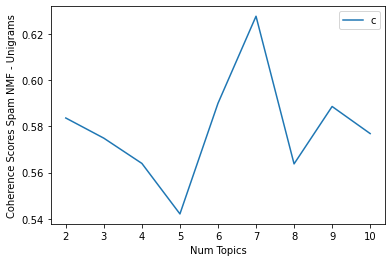

In [43]:
x_uni = range(min_topics, max_topics, step_size)
plt.plot(x_uni, uni_spam_nmf_coher_vals)
plt.xlabel("Num Topics") 
plt.ylabel("Coherence Scores Spam NMF - Unigrams") 
plt.legend(("coherence_values"), loc='best') 
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


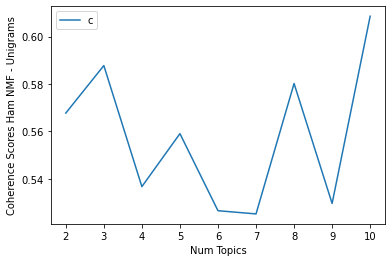

In [44]:
plt.plot(x_uni, uni_ham_nmf_coher_vals)
plt.xlabel("Num Topics") 
plt.ylabel("Coherence Scores Ham NMF - Unigrams") 
plt.legend(("coherence_values"), loc='best') 
plt.show()

# Final Model Gensim NMF - Unigrams

In [45]:
# Num Topics Spam - Uni
uni_spam_nmf_topic_idx1 = np.argmax(uni_spam_nmf_coher_vals)
print(uni_spam_nmf_topic_idx1)
print(uni_spam_nmf_coher_vals[uni_spam_nmf_topic_idx1]) 

5
0.6275349259496652


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
# Gensim LDA Model - Uni - Spam
uni_spam_nmf_num_topics1 = uni_spam_nmf_topic_idx1 + 2
uni_spam_nmf_model1, uni_ham_nmf_model1, uni_spam_nmf_coher1, uni_ham_nmf_coher1 = spamNMFModel(uni_spam_df, uni_ham_df, uni_spam_corpus, uni_ham_corpus, uni_spam_dictionary, uni_ham_dictionary, "tokens", uni_spam_nmf_num_topics1)

# Print topics for spam text
print("Topics for spam text:")
for topic_id, topic in uni_spam_nmf_model1.print_topics(num_topics=uni_spam_nmf_num_topics1):
    print(f'Topic {topic_id}: {topic}')
print()

print("Coherence score for spam topics:", uni_spam_nmf_coher1)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:571: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:600: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` names

/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


Topics for spam text:
Topic 0: 0.040*"font" + 0.027*"td" + 0.026*"face" + 0.025*"size" + 0.025*"color" + 0.018*"br" + 0.017*"align" + 0.017*"width" + 0.015*"tr" + 0.014*"height"
Topic 1: 0.015*"report" + 0.014*"mail" + 0.014*"email" + 0.011*"order" + 0.011*"address" + 0.010*"money" + 0.009*"program" + 0.009*"people" + 0.009*"name" + 0.008*"send"
Topic 2: 0.023*"company" + 0.007*"market" + 0.006*"product" + 0.006*"inc" + 0.006*"information" + 0.005*"gas" + 0.005*"future" + 0.005*"investor" + 0.005*"investment" + 0.004*"year"
Topic 3: 0.068*"de" + 0.015*"la" + 0.015*"en" + 0.015*"mail" + 0.009*"gas" + 0.009*"el" + 0.008*"que" + 0.007*"con" + 0.007*"se" + 0.007*"ur"
Topic 4: 0.023*"statement" + 0.016*"home" + 0.014*"may" + 0.013*"forward" + 0.009*"share" + 0.008*"lauraan" + 0.008*"new" + 0.008*"news" + 0.008*"looking" + 0.007*"price"
Topic 5: 0.039*"http" + 0.039*"www" + 0.027*"com" + 0.010*"site" + 0.010*"co" + 0.008*"web" + 0.007*"uk" + 0.005*"travel" + 0.005*"holiday" + 0.005*"tiscali"

# Wordcloud - NMF Spam Text Unigrams

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


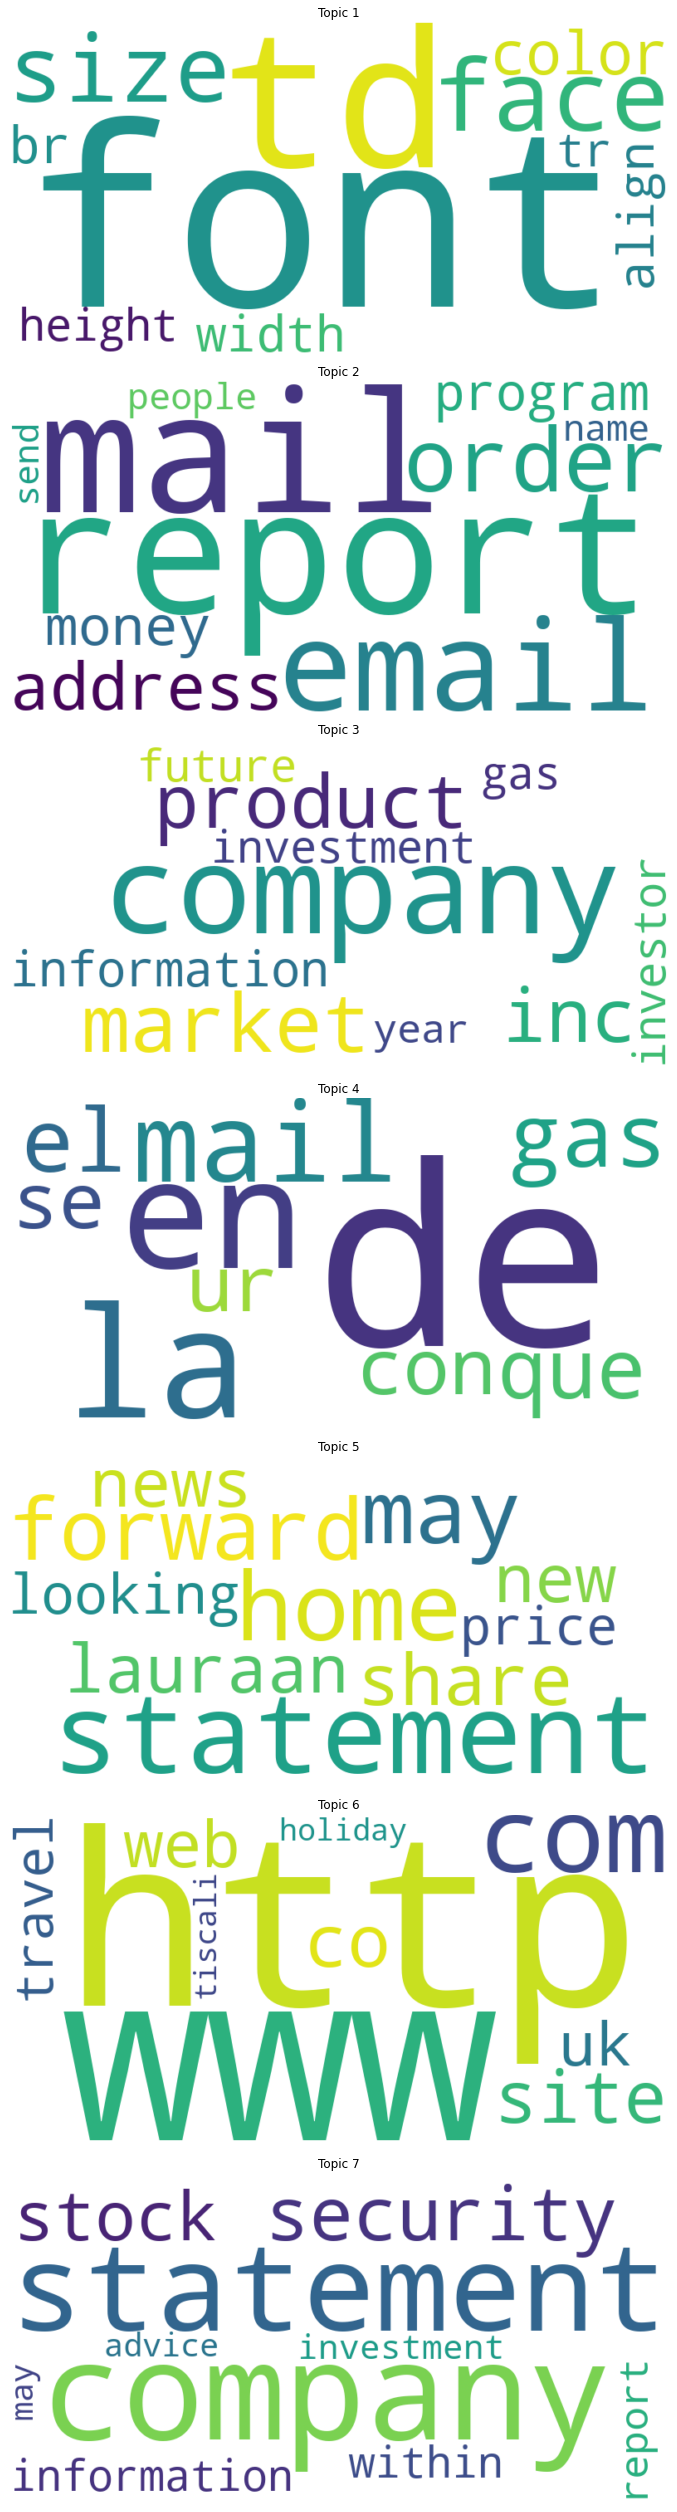

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the new topics
new_topics = [
    {"font": 0.040, "td": 0.027, "face": 0.026, "size": 0.025, "color": 0.025, "br": 0.018, "align": 0.017, "width": 0.017, "tr": 0.015, "height": 0.014},
    {"report": 0.015, "mail": 0.014, "email": 0.014, "order": 0.011, "address": 0.011, "money": 0.010, "program": 0.009, "people": 0.009, "name": 0.009, "send": 0.008},
    {"company": 0.023, "market": 0.007, "product": 0.006, "inc": 0.006, "information": 0.006, "gas": 0.005, "future": 0.005, "investor": 0.005, "investment": 0.005, "year": 0.004},
    {"de": 0.068, "la": 0.015, "en": 0.015, "mail": 0.015, "gas": 0.009, "el": 0.009, "que": 0.008, "con": 0.007, "se": 0.007, "ur": 0.007},
    {"statement": 0.023, "home": 0.016, "may": 0.014, "forward": 0.013, "share": 0.009, "lauraan": 0.008, "new": 0.008, "news": 0.008, "looking": 0.008, "price": 0.007},
    {"http": 0.039, "www": 0.039, "com": 0.027, "site": 0.010, "co": 0.010, "web": 0.008, "uk": 0.007, "travel": 0.005, "holiday": 0.005, "tiscali": 0.005},
    {"company": 0.023, "statement": 0.023, "security": 0.021, "stock": 0.018, "information": 0.015, "within": 0.015, "report": 0.013, "investment": 0.009, "may": 0.008, "advice": 0.008}
]

# Generate and display word clouds for each topic
generate_wordcloud_per_topic(new_topics)


In [47]:
# Num Topics Ham - Uni
uni_ham_nmf_topic_idx2 = np.argmax(uni_ham_nmf_coher_vals)
print(uni_ham_nmf_topic_idx2)
print(uni_ham_nmf_coher_vals[uni_ham_nmf_topic_idx2]) 

8
0.6085790138013112


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
# Gensim LDA Model - Uni - Ham
uni_ham_nmf_num_topics2 = uni_ham_nmf_topic_idx2 + 2
uni_spam_nmf_model2, uni_ham_nmf_model2, uni_spam_nmf_coher2, uni_ham_nmf_coher2 = spamNMFModel(uni_spam_df, uni_ham_df, uni_spam_corpus, uni_ham_corpus, uni_spam_dictionary, uni_ham_dictionary, "tokens", uni_ham_nmf_num_topics2)

# Print topics for ham text
print("Topics for spam text:")
for topic_id, topic in uni_spam_nmf_model2.print_topics(num_topics=uni_ham_nmf_num_topics2):
    print(f'Topic {topic_id}: {topic}')
print()

print("Coherence score for ham topics:", uni_ham_nmf_coher2)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:571: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:600: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` names

/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/anaconda3/lib/python3.8/site-packages/gensim/models/nmf.py:613: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):


Topics for spam text:
Topic 0: 0.014*"com" + 0.007*"free" + 0.007*"product" + 0.007*"business" + 0.005*"service" + 0.005*"new" + 0.005*"one" + 0.005*"site" + 0.005*"sale" + 0.004*"get"
Topic 1: 0.031*"report" + 0.022*"mail" + 0.018*"order" + 0.015*"people" + 0.014*"money" + 0.013*"program" + 0.013*"name" + 0.012*"make" + 0.012*"send" + 0.010*"get"
Topic 2: 0.031*"font" + 0.020*"face" + 0.020*"color" + 0.020*"size" + 0.019*"adobe" + 0.019*"td" + 0.014*"br" + 0.013*"align" + 0.011*"width" + 0.010*"tr"
Topic 3: 0.073*"http" + 0.065*"www" + 0.023*"com" + 0.020*"co" + 0.016*"uk" + 0.014*"td" + 0.013*"travel" + 0.013*"holiday" + 0.013*"tiscali" + 0.013*"flight"
Topic 4: 0.028*"statement" + 0.021*"home" + 0.018*"forward" + 0.016*"security" + 0.014*"may" + 0.011*"lauraan" + 0.010*"within" + 0.010*"news" + 0.008*"event" + 0.008*"looking"
Topic 5: 0.037*"company" + 0.019*"statement" + 0.012*"stock" + 0.010*"information" + 0.009*"may" + 0.009*"within" + 0.008*"future" + 0.008*"inc" + 0.008*"repor

# Wordcloud - NMF Ham Text Unigrams

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


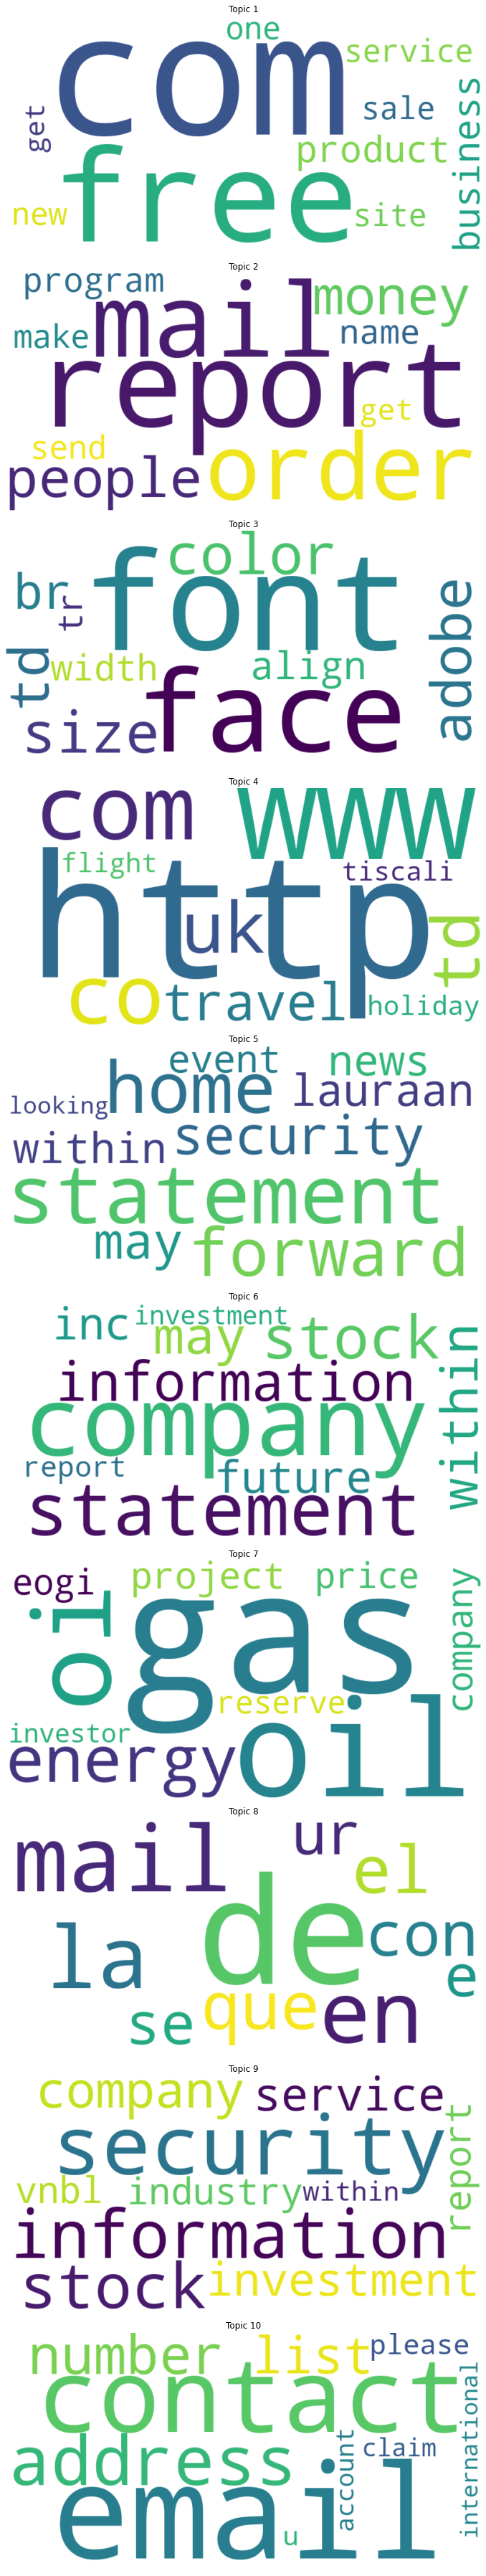

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the new topics
new_topics = [
    {"com": 0.014, "free": 0.007, "product": 0.007, "business": 0.007, "service": 0.005, "new": 0.005, "one": 0.005, "site": 0.005, "sale": 0.005, "get": 0.004},
    {"report": 0.031, "mail": 0.022, "order": 0.018, "people": 0.015, "money": 0.014, "program": 0.013, "name": 0.013, "make": 0.012, "send": 0.012, "get": 0.010},
    {"font": 0.031, "face": 0.020, "color": 0.020, "size": 0.020, "adobe": 0.019, "td": 0.019, "br": 0.014, "align": 0.013, "width": 0.011, "tr": 0.010},
    {"http": 0.073, "www": 0.065, "com": 0.023, "co": 0.020, "uk": 0.016, "td": 0.014, "travel": 0.013, "holiday": 0.013, "tiscali": 0.013, "flight": 0.013},
    {"statement": 0.028, "home": 0.021, "forward": 0.018, "security": 0.016, "may": 0.014, "lauraan": 0.011, "within": 0.010, "news": 0.010, "event": 0.008, "looking": 0.008},
    {"company": 0.037, "statement": 0.019, "stock": 0.012, "information": 0.010, "may": 0.009, "within": 0.009, "future": 0.008, "inc": 0.008, "report": 0.008, "investment": 0.007},
    {"gas": 0.034, "oil": 0.020, "oi": 0.012, "energy": 0.012, "project": 0.010, "price": 0.009, "company": 0.009, "eogi": 0.009, "reserve": 0.007, "investor": 0.007},
    {"de": 0.080, "mail": 0.019, "la": 0.017, "en": 0.017, "el": 0.009, "que": 0.009, "con": 0.008, "se": 0.007, "e": 0.007, "ur": 0.007},
    {"security": 0.027, "information": 0.017, "stock": 0.015, "company": 0.009, "investment": 0.008, "service": 0.008, "industry": 0.008, "report": 0.008, "vnbl": 0.008, "within": 0.008},
    {"email": 0.039, "contact": 0.022, "address": 0.021, "number": 0.016, "list": 0.014, "please": 0.010, "u": 0.009, "claim": 0.008, "account": 0.008, "international": 0.007}
]

# Generate and display word clouds for each topic
generate_wordcloud_per_topic(new_topics)

# Getting NMF topics from Gensim model - Unigrams

In [49]:
# bi-gram spam topics
uni_spam_nmf_topics = get_topics(uni_spam_nmf_model1, uni_spam_nmf_num_topics1)
uni_spam_nmf_topics

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic # 01 Topic # 02   Topic # 03 Topic # 04 Topic # 05 Topic # 06  \
0        font     report      company         de  statement       http   
1          td       mail       market         la       home        www   
2        face      email      product         en        may        com   
3        size      order          inc       mail    forward       site   
4       color    address  information        gas      share         co   
5          br      money          gas         el    lauraan        web   
6       align    program       future        que        new         uk   
7       width     people     investor        con       news     travel   
8          tr       name   investment         se    looking    holiday   
9      height       send         year         ur      price    tiscali   
10   fontfont   business          one          e      event     flight   
11       http       make        stock       para     within       free   
12     border        get            u   empresas     market     search   
13         nd       free          oil        del       time    message   
14       href       list   technology         si        act      email   
15        src        one     business        los       next        net   
16     center    contact          new          m   security     online   
17      style       work          may        est    product       look   
18        div       time      million         st    meaning     please   
19     strong     number     industry          r    revenue    hotlist   

     Topic # 07  
0       company  
1     statement  
2      security  
3         stock  
4   information  
5        within  
6        report  
7    investment  
8           may  
9        advice  
10      looking  
11      forward  
12         fact  
13         news  
14          act  
15         risk  
16  performance  
17        event  
18        price  
19     material

In [50]:
# bi-gram ham topics
bi_ham_nmf_topics = get_topics(uni_ham_nmf_model2, uni_ham_nmf_num_topics2)
bi_ham_nmf_topics

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic # 01  Topic # 02   Topic # 03     Topic # 04 Topic # 05  Topic # 06  \
0         data     company        enron            ect     dynegy       enron   
1     database        said  partnership            hou       said        corp   
2       dbcaps       stock       fastow          enron      enron     company   
3      unknown        year      company           corp     energy          et   
4        alias       share    financial             cc    company  bankruptcy   
5    operation     billion     investor        subject    trading      credit   
6        error     million        chief             pm        inc         new   
7      perform         new          lay             ee        gas     billion   
8       closed         dow      officer            lon    billion       asset   
9          com   financial           mr          meter    percent       power   
10    schedule   copyright  transaction      forwarded       deal      rating   
11   hourahead    investor        stock             na       debt     houston   
12         dpc       jones    executive         robert     trader         say   
13         net       price      analyst          vince     rating        bank   
14        mseb    business  shareholder         please     market     trading   
15  government     quarter     security  communication    natural         may   
16     project      credit        share         thanks      jones        debt   
17       state        time          ljm            gco        dow      energy   
18           r     analyst         week           deal      share     million   
19       power  investment   confidence       kaminski    service    employee   

     Topic # 07 Topic # 08   Topic # 09   Topic # 10  
0         power      enron          com       energy  
1         state     dynegy          net      subject  
2           dpc      stock          aol          gas  
3          mseb       deal      hotmail       please  
4       project       year         home        vince  
5         board      share        yahoo       market  
6        notice       time        flash           pm  
7   termination      would         mail      message  
8    government     merger      airmail           cc  
9          said  executive          usa        would  
10       lender      could          edu  information  
11        would   employee  information         term  
12       dabhol       cent          www         time  
13      company      price          msn         risk  
14      meeting        new           ti          new  
15     decision        per         http        price  
16  maharashtra    company      subject     business  
17  electricity   business      message        group  
18        issue       plan          org         need  
19            r        one          att          day

# Most dominant topics NMF Gensim

In [51]:
# Use your NMF models and data
uni_NMF_spam_dominant_topics = format_topics_sentences(ldamodel=uni_spam_nmf_model1, corpus=uni_spam_corpus, data=uni_spam_df['cleaned_text'], dictionary=uni_spam_dictionary)
uni_NMF_ham_dominant_topics = format_topics_sentences(ldamodel=uni_spam_nmf_model2, corpus=uni_ham_corpus, data=uni_ham_df['cleaned_text'], dictionary=uni_ham_dictionary)

# For spam text
print("Dominant topics for spam text:")
print(uni_NMF_spam_dominant_topics.head())

# For ham text
print("\nDominant topics for ham text:")
print(uni_NMF_ham_dominant_topics.head())


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dominant topics for spam text:
   Document_No  Dominant_Topic  Perc_Contribution  \
0            0               2             0.4393   
1            1               3             1.0000   
2            2               4             0.4869   
3            3               6             0.7645   
4            4               4             0.4093   

                                            Keywords  \
0  company, market, product, inc, information, ga...   
1        de, la, en, mail, gas, el, que, con, se, ur   
2  statement, home, may, forward, share, lauraan,...   
3  company, statement, security, stock, informati...   
4  statement, home, may, forward, share, lauraan,...   

                                                Text  
0  calgary , alberta , jul 7 , 2005 ( ccnmatthews...  
1  als je dit bericht niet kan lezen , klik hier ...  
2  the most popular software available at the roc...  
3  homeland security investments the terror attac...  
4  keeping your private medical issues

# BERTopic - Jaden

In [52]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bertopic import BERTopic
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LdaModel

# Preprocessing function
def preprocess_text2(text, custom_stopwords):
    # Ensure text is a string
    if not isinstance(text, str):
        return ""
    
    # Remove non-alphabetical characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenize, remove stopwords, lemmatize, and filter out short words
    tokens = word_tokenize(text.lower())
    lemmatizer = WordNetLemmatizer()
    filtered_words = [lemmatizer.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) > 1]
    return ' '.join(filtered_words)

# Define custom stopwords
custom_stopwords = set(stopwords.words('english')) | {'enron'}

# Apply preprocessing with the adjusted function
df['preprocessed_text'] = df['cleaned_text'].apply(lambda x: preprocess_text2(x, custom_stopwords))


# Splitting the DataFrame into spam and ham subsets
spam_texts = df[df['label'] == 'spam']['preprocessed_text']
ham_texts = df[df['label'] == 'ham']['preprocessed_text']

def calculate_and_print_topics(texts, n_topics_range, label):
    for n_topics in n_topics_range:
        topic_model = BERTopic(nr_topics=n_topics, language="english")
        topics, _ = topic_model.fit_transform(texts.tolist())
        topic_label = n_topics-1
        # Print top topics
        print(f"\nTop topics for {label} texts with {topic_label} topics:")
        for topic_number in topic_model.get_topic_freq().head(n_topics+1)['Topic']:
            if topic_number == -1: continue  # Skip the outlier topic if present
            topic = topic_model.get_topic(topic_number)
            print(f"Topic {topic_number}: ", end="")
            print(", ".join([word for word, _ in topic]))

        # Prepare for coherence score calculation
        topic_terms = [topic_model.get_topic(topic) for topic in sorted(list(set(topics))) if topic != -1]
        topics_gensim = [[word for word, _ in topic] for topic in topic_terms]

        dictionary = Dictionary(topics_gensim)
        corpus = [dictionary.doc2bow(text) for text in topics_gensim]

        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=len(topic_terms), random_state=42,chunksize=100,passes=2,iterations=600)
        coherence_model_lda = CoherenceModel(model=lda_model, texts=topics_gensim, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model_lda.get_coherence()
        
        print(f"Coherence Score for {label} texts with {topic_label} topics: {coherence_score}")

n_topics_range = range(3, 12)

print("Analyzing Spam Texts:")
calculate_and_print_topics(spam_texts, n_topics_range, "spam")

print("\nAnalyzing Ham Texts:")
calculate_and_print_topics(ham_texts, n_topics_range, "ham")


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/plotly/express/imshow_utils.py:24: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),
/opt/anaconda3/lib/python3.8/site-packages/plotly/graph_objs/__init__.py:283: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
/opt/anaconda3/lib/python3.8/site-packages/plotly/graph_objs/__init__.py:283: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__ve

Analyzing Spam Texts:


/opt/anaconda3/lib/python3.8/site-packages/sympy/external/importtools.py:158: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(modversion) < LooseVersion(min_module_version):
/opt/anaconda3/lib/python3.8/site-packages/sympy/external/importtools.py:158: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(modversion) < LooseVersion(min_module_version):



Top topics for spam texts with 2 topics:
Topic 0: company, com, email, http, information, price, please, statement, business, one
Topic 1: said, palestinian, shell, source, israeli, military, towards, gaza, gissin, soldier
Coherence Score for spam texts with 2 topics: 0.02572281054695958

Top topics for spam texts with 3 topics:
Topic 0: company, com, email, http, information, please, price, statement, business, may
Topic 1: identifier, expires, point, code, show, unredeemed, private, call, account, redeemed
Topic 2: said, palestinian, shell, source, israeli, military, towards, gaza, gissin, soldier
Coherence Score for spam texts with 3 topics: 0.21850814257403664

Top topics for spam texts with 4 topics:
Topic 0: company, com, email, http, information, please, price, statement, security, may
Topic 1: click, removed, overpay, image, load, wait, double, limited, detail, free
Topic 2: said, palestinian, shell, source, israeli, military, towards, gaza, gissin, soldier
Topic 3: unredeemed

Coherence Score for ham texts with 7 topics: 0.4643795668679896

Top topics for ham texts with 8 topics:
Topic 0: ect, company, said, hou, energy, would, com, new, please, market
Topic 1: ur, ok, love, im, get, dont, call, gt, go, lt
Topic 2: xl, hplno, attached, file, see, hplo, hplnl, hplnol, hpll, please
Topic 3: commit, pain, fix, fixed, test, bug, error, xnamex, git, med
Topic 4: rpm, list, package, url, matthias, apt, wrote, freshrpms, alsa, hat
Topic 5: hpl, tap, teco, iferc, lsk, ic, daily, gas, katy, actuals
Topic 6: script, user, installation, root, setup, run, login, su, optional, account
Topic 7: paste, window, selection, exmh, tony, sel, cut, clipboard, text, insert
Coherence Score for ham texts with 8 topics: 0.46975686154076834

Top topics for ham texts with 9 topics:
Topic 0: ect, company, said, hou, com, energy, new, would, market, please
Topic 1: get, url, ok, like, im, ur, go, love, got, good
Topic 2: url, rpm, date, list, linux, package, wrote, supplied, matthias, a

# BERTopic - Spam Texts

# Optimal Number of Topics: 10
# Coherence Score: 0.5379977395902995

# Wordcloud - BERTopic Spam Text Unigrams

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


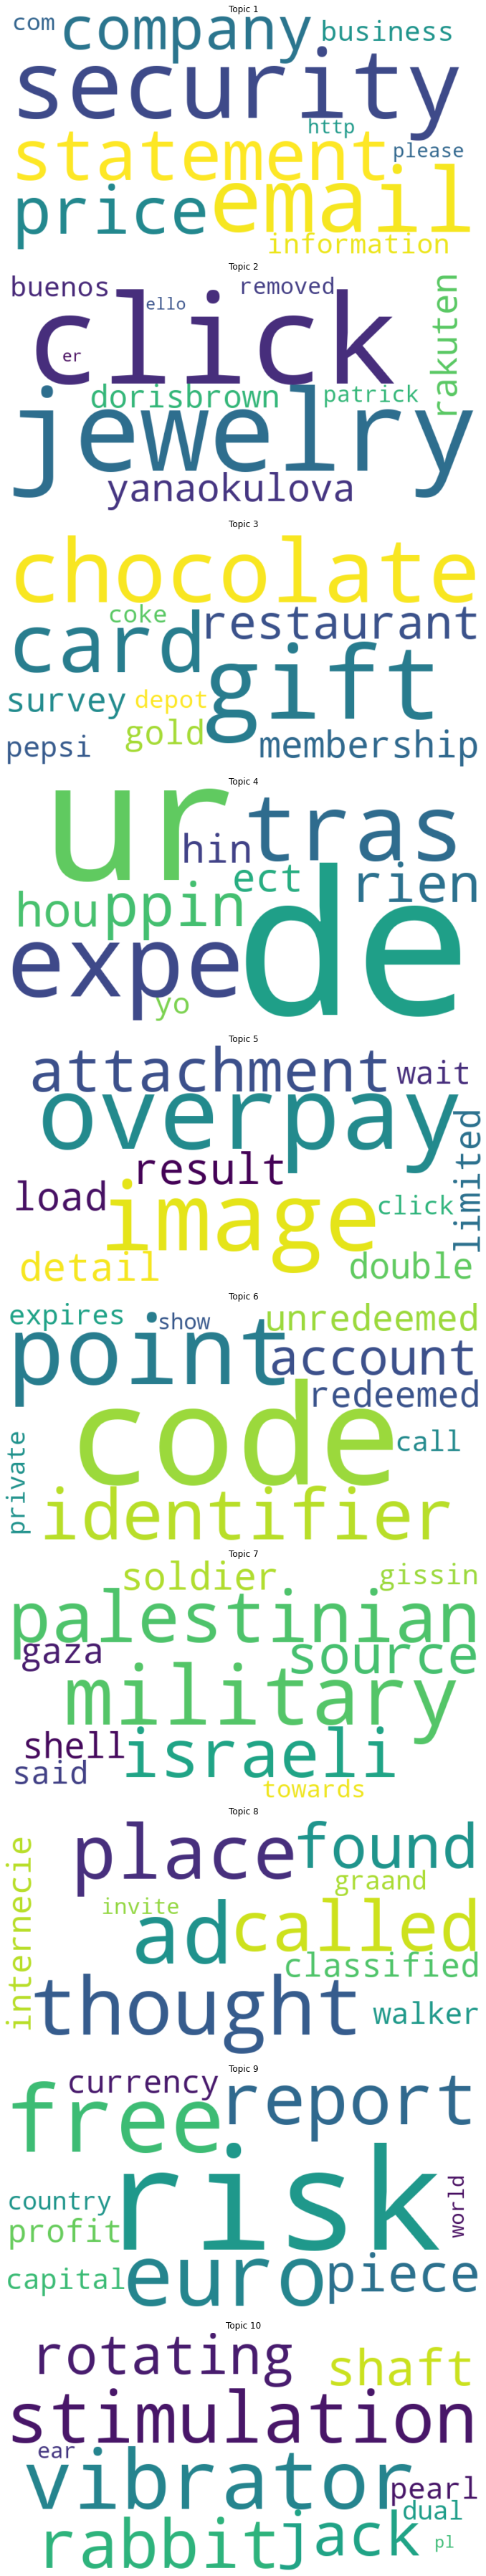

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define topics with weights
topics = [
  {"company": 0.05, "com": 0.03, "email": 0.08, "information": 0.04, "http": 0.02, "statement": 0.07, "please": 0.02, "price": 0.06, "security": 0.09, "business": 0.04},
  {"removed": 0.02, "click": 0.08, "ello": 0.01, "buenos": 0.03, "dorisbrown": 0.04, "rakuten": 0.05, "jewelry": 0.07, "yanaokulova": 0.06, "patrick": 0.02, "er": 0.01},
  {"gift": 0.09, "card": 0.07, "chocolate": 0.08, "restaurant": 0.06, "depot": 0.02, "membership": 0.05, "pepsi": 0.03, "gold": 0.04, "coke": 0.02, "survey": 0.04},
  {"de": 0.12, "ur": 0.08, "ppin": 0.05, "hou": 0.03, "yo": 0.01, "hin": 0.02, "rien": 0.04, "tras": 0.06, "expe": 0.07, "ect": 0.02},
  {"overpay": 0.08, "load": 0.05, "image": 0.07, "attachment": 0.06, "wait": 0.03, "double": 0.04, "click": 0.02, "detail": 0.05, "limited": 0.04, "result": 0.06},
  {"identifier": 0.07, "expires": 0.05, "point": 0.08, "unredeemed": 0.06, "code": 0.09, "show": 0.03, "private": 0.04, "call": 0.05, "account": 0.07, "redeemed": 0.06},
  {"said": 0.04, "palestinian": 0.08, "shell": 0.05, "source": 0.06, "israeli": 0.07, "military": 0.09, "towards": 0.03, "gaza": 0.05, "gissin": 0.04, "soldier": 0.06},
  {"graand": 0.03, "place": 0.07, "classified": 0.05, "walker": 0.04, "invite": 0.02, "called": 0.06, "thought": 0.08, "ad": 0.09, "internecie": 0.05, "found": 0.06},
  {"euro": 0.07, "currency": 0.05, "free": 0.08, "report": 0.06, "capital": 0.04, "country": 0.03, "world": 0.02, "profit": 0.05, "risk": 0.09, "piece": 0.06},
  {"vibrator": 0.10, "rabbit": 0.08, "jack": 0.07, "rotating": 0.06, "shaft": 0.05, "stimulation": 0.09, "pearl": 0.04, "dual": 0.03, "ear": 0.02, "pl": 0.01}  # Please note the sensitive nature of this topic
]

# Generate and display word clouds for each topic
generate_wordcloud_per_topic(topics)



# BERTopic - Ham Texts

# Optimal Number of Topics: 8
# Coherence Score: 0.46975686154076834

# Wordcloud - BERTopic Ham Text Unigrams

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


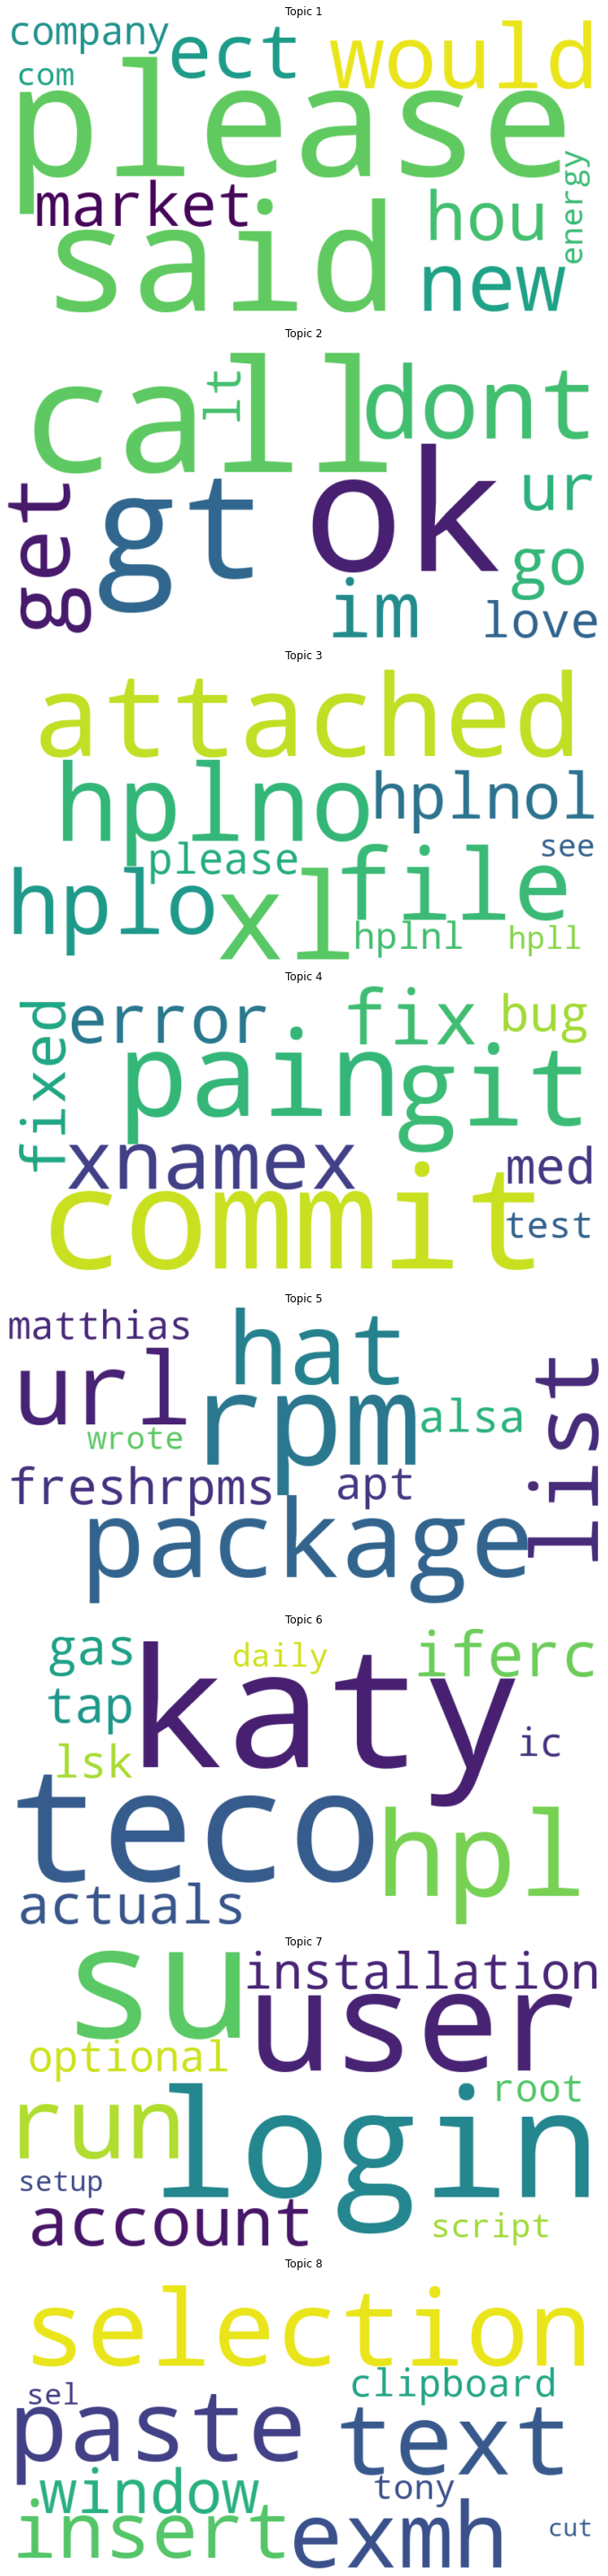

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the new topics
new_topics = [
    {"ect": 0.05, "company": 0.03, "said": 0.08, "hou": 0.04, "energy": 0.02, "would": 0.07, "com": 0.02, "new": 0.06, "please": 0.09, "market": 0.04},
    {"ur": 0.02, "ok": 0.08, "love": 0.01, "im": 0.03, "get": 0.04, "dont": 0.05, "call": 0.07, "gt": 0.06, "go": 0.02, "lt": 0.01},
    {"xl": 0.09, "hplno": 0.07, "attached": 0.08, "file": 0.06, "see": 0.02, "hplo": 0.05, "hplnl": 0.03, "hplnol": 0.04, "hpll": 0.02, "please": 0.04},
    {"commit": 0.12, "pain": 0.08, "fix": 0.05, "fixed": 0.03, "test": 0.01, "bug": 0.02, "error": 0.04, "xnamex": 0.06, "git": 0.07, "med": 0.02},
    {"rpm": 0.08, "list": 0.05, "package": 0.07, "url": 0.06, "matthias": 0.03, "apt": 0.04, "wrote": 0.02, "freshrpms": 0.05, "alsa": 0.04, "hat": 0.06},
    {"hpl": 0.07, "tap": 0.05, "teco": 0.08, "iferc": 0.06, "lsk": 0.04, "ic": 0.03, "daily": 0.02, "gas": 0.05, "katy": 0.09, "actuals": 0.06},
    {"script": 0.03, "user": 0.07, "installation": 0.05, "root": 0.04, "setup": 0.02, "run": 0.06, "login": 0.08, "su": 0.09, "optional": 0.05, "account": 0.06},
    {"paste": 0.07, "window": 0.05, "selection": 0.08, "exmh": 0.06, "tony": 0.04, "sel": 0.03, "cut": 0.02, "clipboard": 0.05, "text": 0.07, "insert": 0.06}
]

# Generate and display word clouds for each topic
generate_wordcloud_per_topic(new_topics)

# The code below are libraries we experimented with but did not implement in our project

# LDA model - SKLearn NMF

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.preprocessing import normalize
from sklearn.decomposition import NMF
from sklearn.model_selection import GridSearchCV
from pprint import pprint
import spacy

## Preprocessing and lemmatization

In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

def preprocess_text_sklearn(text):
    # Remove non-alphabetical characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenize into words, remove stopwords, lemmatize, and filter out short words
    tokens = word_tokenize(text.lower())
    filtered_words = [lemmatizer.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) > 1]
    return filtered_words

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
ham_data_lemmatized = lemmatization(bi_ham_df['tokens_bi'], allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
spam_data_lemmatized = lemmatization(bi_spam_df['tokens_bi'], allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


## Vectorizing spam and ham df

In [ ]:
vectorizer = CountVectorizer(analyzer='word',       
                         min_df=10,                        # minimum reqd occurences of a word 
                         stop_words='english',             # remove stop words
                         lowercase=True,                   # convert all words to lowercase
                         token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                         # max_features=50000,             # max number of uniq words
                        )


In [ ]:
def dataVect(dataLemm):
    data_vectorized = vectorizer.fit_transform(dataLemm)
    return data_vectorized

In [ ]:
ham_data_vect = dataVect(ham_data_lemmatized)
spam_data_vect = dataVect(spam_data_lemmatized)

## Building NMF model

In [ ]:
def nmfModel(dataVect, num_topics):
    transformer = TfidfTransformer()
    
    nmf_tfidf = transformer.fit_transform(dataVect)
    nmf_tfidf_norm = normalize(nmf_tfidf, norm='l1', axis=1)
    
    nmf_tf_model = NMF(n_components=10, init='nndsvd');
    nmf_tf_model.fit(nmf_tfidf_norm)
    
    return nmf_tf_model, nmf_tfidf_norm

In [ ]:
spam_nmf, spam_nmf_tfidf = nmfModel(spam_data_vect, 10)
ham_nmf, ham_nmf_tfidf = nmfModel(ham_data_vect, 10)

## Getting NMF topics from vector

In [ ]:
# Get words from each topic 
def get_nmf_topics(model, n_top_words):
    # the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    word_dict = {};
    for i in range(n_top_words):
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        words = [re.sub('\S*@\S*\s?', '', sent) for sent in words]
        words = [re.sub('\s+', ' ', sent) for sent in words]
        words = [re.sub("\'", "", sent) for sent in words]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    return pd.DataFrame(word_dict);

In [ ]:
spam_nmf_output = get_nmf_topics(spam_nmf, 10)
spam_nmf_output

In [ ]:
ham_nmf_output = get_nmf_topics(ham_nmf, 10)
ham_nmf_output

# Topwords from SKLearn NMF

In [ ]:
# def show_top_nmf_topics(lda_model, n_words):
#     keywords = np.array(vectorizer.get_feature_names())
#     topic_keywords = []
#     for topic_weights in lda_model.components_:
#         top_keyword_locs = (-topic_weights).argsort()[:n_words]
#         topic_keywords.append(keywords.take(top_keyword_locs))
#     return topic_keywords

In [ ]:
# spam_nmf_topic_keywords = show_top_nmf_topics(spam_nmf, 10)  

# # Topic - Keywords Dataframe - NMF - spam
# spam_nmf_df_topic_keywords = pd.DataFrame(spam_nmf_topic_keywords)
# spam_nmf_df_topic_keywords.columns = ['Word '+str(i) for i in range(spam_nmf_df_topic_keywords.shape[1])]
# spam_nmf_df_topic_keywords.index = ['Topic '+str(i) for i in range(spam_nmf_df_topic_keywords.shape[0])]
# spam_nmf_df_topic_keywords

In [ ]:
# ham_nmf_topic_keywords = show_topics(ham_nmf_tfidf, ham_nmf, 10)  

# # Topic - Keywords Dataframe - NMF - ham
# ham_nmf_df_topic_keywords = pd.DataFrame(ham_nmf_topic_keywords)
# ham_nmf_df_topic_keywords.columns = ['Word '+str(i) for i in range(ham_nmf_df_topic_keywords.shape[1])]
# ham_nmf_df_topic_keywords.index = ['Topic '+str(i) for i in range(ham_nmf_df_topic_keywords.shape[0])]
# ham_nmf_df_topic_keywords

# LDA model - SKLearn LDA

In [ ]:
def spamLdaSklearn(spamDataVect, hamDataVect, numTopics):
    lda_sk_model = LatentDirichletAllocation(
                                          n_components=numTopics,        # Number of topics
                                          max_iter=10,               # Max learning iterations
                                          learning_method='online',   
                                          random_state=100,          # Random state
                                          batch_size=128,            # n docs in each learning iter
                                          evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                          n_jobs = -1,               # Use all available CPUs
                                         )
    spam_lda_sk_output = lda_sk_model.fit_transform(spamDataVect)
    ham_lda_sk_output = lda_sk_model.fit_transform(hamDataVect)
    return spam_lda_sk_output, ham_lda_sk_output, lda_sk_model

In [ ]:
spam_lda_sk_model, ham_lda_sk_model, lda_sk_model = spamLdaSklearn(spam_data_vect, ham_data_vect, 10)

In [ ]:
spam_nmf_output = spam_nmf.transform(spam_nmf_tfidf)
spam_nmf_output

In [ ]:
from tqdm import tqdm
import numpy as np
sp = []
for i in tqdm(range(len(spam_nmf_output))):
    s1 = spam_nmf_output[i]/sum(spam_nmf_output[i])
    sp.append(s1)
spam_nmf_output = np.array(sp)
dsp = spam_nmf_output
dsp = dsp * 100
len(dsp)

In [ ]:
ham_nmf_output = ham_nmf.transform(ham_nmf_tfidf)
ham_nmf_output

In [ ]:
ha = []
for i in tqdm(range(len(ham_nmf_output))):
    h1 = ham_nmf_output[i]/sum(ham_nmf_output[i])
    ha.append(h1)
ham_nmf_output = np.array(ha)
dha = ham_nmf_output
dha = dha * 100
len(dha)

# Topwords from SKLearn LDA

In [ ]:
def show_topics(vecto, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords


In [ ]:
sk_topic_keywords = show_topics(vectorizer, lda_model=lda_sk_model, n_words=10)        

# Topic - Keywords Dataframe - Skmodel
sk_df_topic_keywords = pd.DataFrame(sk_topic_keywords)
sk_df_topic_keywords.columns = ['Word '+str(i) for i in range(sk_df_topic_keywords.shape[1])]
sk_df_topic_keywords.index = ['Topic '+str(i) for i in range(sk_df_topic_keywords.shape[0])]
sk_df_topic_keywords

In [ ]:
# LDA_topics_theme = ['People/Life','Party Politics','Misc','Health/International','Work','Sports/Cricket','News/National',
#                 'News','News/Incident','Military','News/Accident','Investment/Trade','Government/Order'
#                ,'Education','News/Police','City/Local','Celebration','Politics/National','University Politics','Sports']

# df_topic_keywords['topic_theme'] = LDA_topics_theme
# df_topic_keywords.set_index('topic_theme', inplace=True)
# df_topic_keywords.T

In [ ]:
# Use your LDA models and data
spam_dominant_topics = format_topics_sentences(ldamodel=spam_lda_sk_model, corpus=bi_spam_corpus, data=bi_spam_df['cleaned_text'], dictionary=bi_spam_dictionary)
ham_dominant_topics = format_topics_sentences(ldamodel=ham_lda_sk_model, corpus=bi_ham_corpus, data=bi_ham_df['cleaned_text'], dictionary=bi_ham_dictionary)

# For spam text
print("Dominant topics for spam text:")
print(spam_dominant_topics.head())

# For ham text
print("\nDominant topics for ham text:")
print(ham_dominant_topics.head())

# Testing LDA Mallet - does not work :(

In [ ]:
# from gensim.models.wrappers import LdaMallet
# os.environ['MALLET_HOME'] = 'Mallet-202108'
# os.environ.update({'MALLET_HOME':r'Mallet-202108'})
# print(os.environ)

In [ ]:
# # Build LDA model for spam text
# def spamLdaMallet(spamDict, hamDict, spamCorp, hamCorp, spamIdDict, hamIdDict, textCol, numTopics):
    
#     mallet_path = 'Mallet-202108/bin/mallet' # update this path
    
#     # Build Mallet model for spam text
#     spam_ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=spamCorp, num_topics=numTopics, id2word=spamIdDict, prefix='temp_file_', workers=4)
#     pprint(spam_ldamallet.show_topics(formatted=False))
    
#     # Calculate coherence score for spam topics
#     spam_coherence_model_ldamallet = CoherenceModel(model=spam_ldamallet, texts=spamDict[textCol], dictionary=spamIdDict, coherence='c_v')
#     spam_coherence_ldamallet = coherence_model_ldamallet.get_coherence()
#     print('\nCoherence Score for spam topics:: ', spam_coherence_ldamallet)
    
#     # Build Mallet model for ham text
#     ham_ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=hamCorp, num_topics=numTopics, id2word=hamIdDict, prefix='temp_file_', workers=4)
#     pprint(spam_ldamallet.show_topics(formatted=False))
    
#     # Calculate coherence score for spam topics
#     ham_coherence_model_ldamallet = CoherenceModel(model=ham_ldamallet, texts=hamDict[textCol], dictionary=hamIdDict, coherence='c_v')
#     ham_coherence_ldamallet = coherence_model_ldamallet.get_coherence()
#     print('\nCoherence Score for ham topics:: ', ham_coherence_ldamallet)
    
    
#     return spam_ldamallet, ham_ldamallet

In [ ]:
# # bigram
# bi_spam_Mallet, bi_ham_Mallet = spamLdaMallet(bi_spam_df, bi_ham_df, bi_spam_corpus, bi_ham_corpus, bi_spam_dictionary, bi_ham_dictionary, "tokens_bi", 10)

In [ ]:
# print(ham_lda_sk_model.score(ham_data_vect))
# print(spam_lda_sk_model.score(spam_data_vect))

In [ ]:
def get_Cv(model, df_columnm):
    topics = model.components_

    n_top_words = 20
    texts = [[word for word in doc.split()] for doc in df_columnm]

    # create the dictionary
    dictionary = corpora.Dictionary(texts)
    # Create a gensim dictionary from the word count matrix

    # Create a gensim corpus from the word count matrix
    corpus = [dictionary.doc2bow(text) for text in texts]

    feature_names = [dictionary[i] for i in range(len(dictionary))]

    # Get the top words for each topic from the components_ attribute
    top_words = []
    for topic in topics:
        top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

    coherence_model = CoherenceModel(topics=top_words, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()
    return coherence

In [ ]:
get_Cv(ham_lda_sk_model, bi_ham_df["tokens_bi"])

In [ ]:
# Calculate coherence score for ham topics
ham_coherence_model = CoherenceModel(model=ham_lda_sk_model, texts=bi_ham_df["tokens_bi"], dictionary=bi_ham_corpus, coherence='c_v')
ham_coherence_score = ham_coherence_model.get_coherence()
print("Coherence score for ham topics:", ham_coherence_score)

In [ ]:
bi_ham_df

In [ ]:
# import gensim
# print(gensim.__version__)